# Clustering Analysis of Features

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

## K-Means Clustering

K-Means clustering is based on Euclidean distance, so scaling the features beforehand is necessary to prevent variables with larger ranges from taking over the clustering process.

In [2]:
# clustering profiles based on top 3 features
df = pd.read_csv("data\cleaned_insurance.csv")
target_col = 'charges'

X = df.drop(columns=[target_col])
y = df[target_col]

top_features = ['smoker', 'bmi', 'age']
X_cluster = X[top_features]

<Figure size 700x500 with 0 Axes>

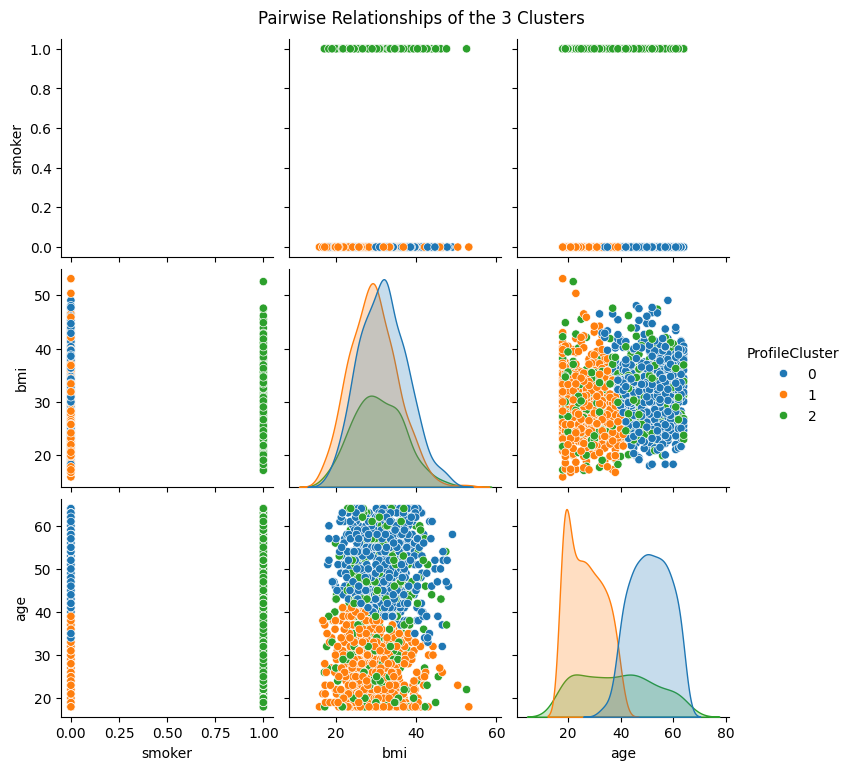

In [3]:
# in order to use k-means clustering, there needs to be a scaling of the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=0)
df['ProfileCluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.pairplot(df, vars=top_features, hue='ProfileCluster', palette='tab10')
plt.suptitle("Pairwise Relationships of the 3 Clusters", y=1.02)
plt.show()

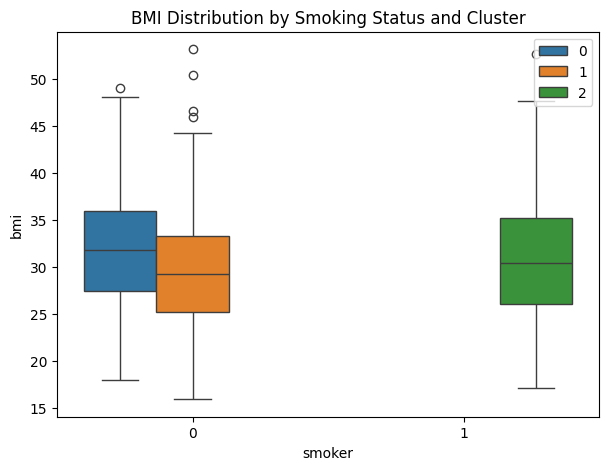

In [4]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='smoker', y='bmi', hue='ProfileCluster', palette='tab10')
plt.title("BMI Distribution by Smoking Status and Cluster")
plt.legend(loc='upper right')
plt.show()

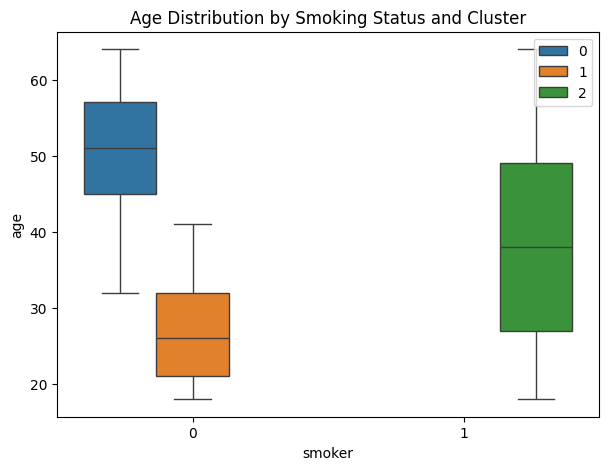

In [5]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='smoker', y='age', hue='ProfileCluster', palette='tab10')
plt.title("Age Distribution by Smoking Status and Cluster")
plt.legend(loc='upper right')
plt.show()

In [6]:
# summary by cluster
cluster_summary = df.groupby('ProfileCluster')[[target_col]].mean()
print("Average Loss per Cluster:")
display(cluster_summary)

Average Loss per Cluster:


,charges
ProfileCluster,
0,11611.725411
1,5059.759581
2,32050.231832


## K-Modes Clustering 

The presence of binary (factors) features makes K-Means Clustering not appropriate for a task like this. Instead, we can use K-Prototypes Clustering, which uses Euclidean distance for continuous variables, but uses dissimilarity for categorical variables.

               age       sex        bmi  children    smoker       charges  \
Cluster                                                                     
0        55.569161  0.494331  31.708685  0.979592  0.170068  17313.590394   
1        39.757075  0.504717  30.487064  1.462264  0.231132  13291.088726   
2        23.458774  0.515856  29.846892  0.873150  0.213531   9482.262172   

         region_northwest  region_southeast  region_southwest  ProfileCluster  
Cluster                                                                        
0                0.244898          0.265306          0.244898        0.340136  
1                0.238208          0.275943          0.247642        0.801887  
2                0.245243          0.274841          0.236786        1.213531  
         sex  smoker  region_northwest  region_southeast  region_southwest
Cluster                                                                   
0          0       0                 0                 0        

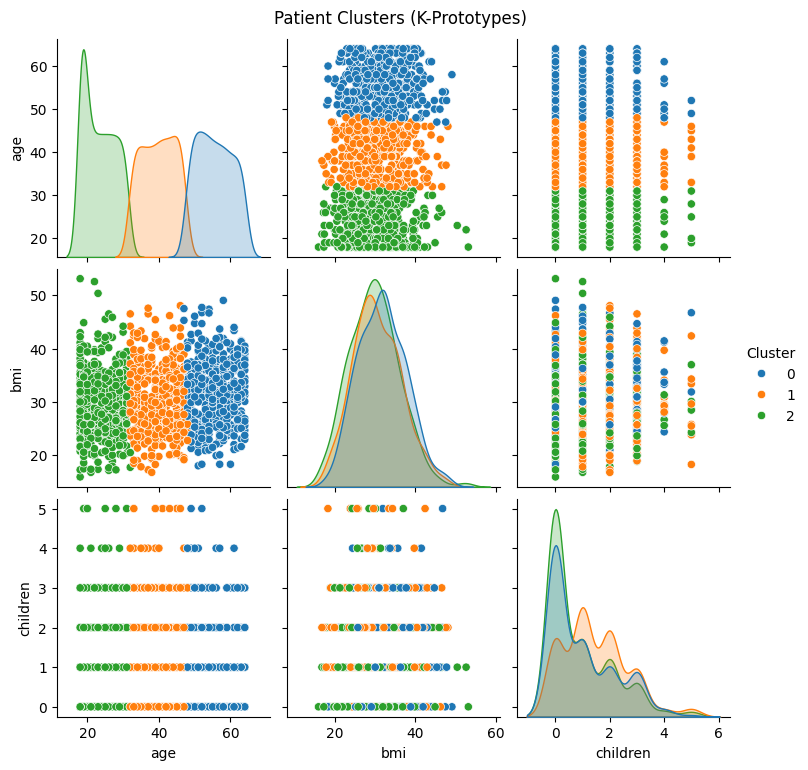

In [ ]:
categorical_columns = ['sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

X_matrix = df.drop(columns=['charges']).to_numpy()

# Find indices of categorical columns
cat_indices = [df.columns.get_loc(col) for col in categorical_columns]

# Initialize and fit K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=0)
clusters = kproto.fit_predict(X_matrix, categorical=cat_indices)

df['Cluster'] = clusters
print(df.groupby('Cluster').mean(numeric_only=True))
print(df.groupby('Cluster')[categorical_columns].agg(lambda x: x.value_counts().index[0]))

sns.pairplot(df, vars=['age', 'bmi', 'children'], hue='Cluster', palette='tab10')
plt.suptitle("Patient Clusters (K-Prototypes)", y=1.02)
plt.show()

In [13]:
# Analysis of the cluster centroids
display(kproto.cluster_centroids_)

array([[55.569161  , 31.70868481,  0.97959184,  0.24489796,  1.51927438,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [39.75707547, 30.48706368,  1.46226415,  0.23820755,  1.42216981,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [23.45877378, 29.84689218,  0.87315011,  0.24524313,  1.46934461,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

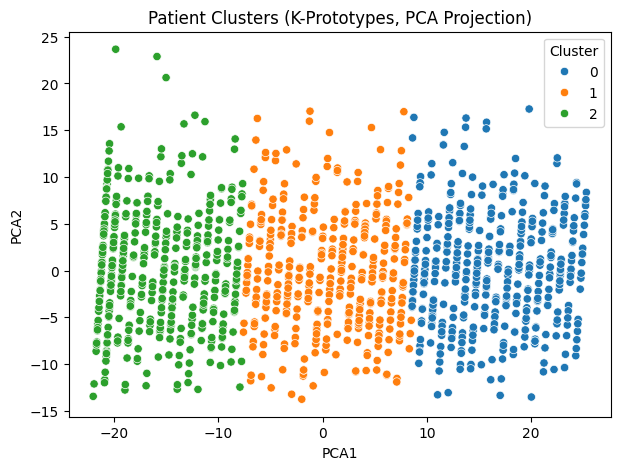

In [12]:
from sklearn.decomposition import PCA

X_num = df[['age', 'bmi', 'children']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_num)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("Patient Clusters (K-Prototypes, PCA Projection)")
plt.show()
